In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
from seaborn import plt

# In depth with SVMs: Support Vector Machines

SVM stands for "support vector machines". They are efficient and easy to use estimators.
They come in two kinds: SVCs, Support Vector Classifiers, for classification problems, and SVRs, Support Vector Regressors, for regression problems.

In [3]:
from sklearn import svm

## Linear SVMs: some intuitions

To develop our intuitions, let us look at a very simple classification problem: classifying irises based on sepal length and width. We only use 2 features to enable easy visualization.

In [4]:
svc = svm.SVC(kernel='linear')
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data[:, :2]
y = iris.target
svc.fit(X, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, degree=3, gamma=0.0,
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

To visualize the prediction, we evaluate it on a grid of points:

In [5]:
from matplotlib.colors import ListedColormap
# Create color maps for 3-class classification problem, as with iris
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

def plot_estimator(estimator, X, y):
    estimator.fit(X, y)
    x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
    y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    Z = estimator.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
    plt.axis('tight')
    plt.axis('off')
    plt.tight_layout()

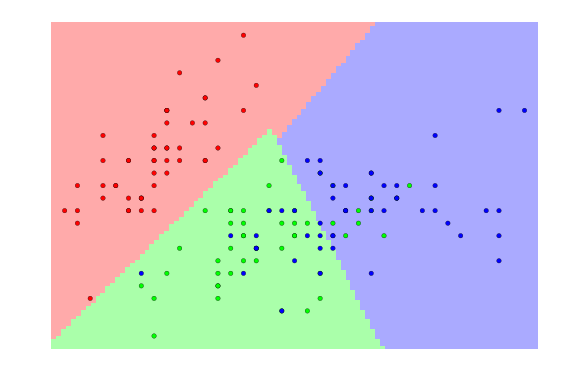

In [6]:
plot_estimator(svc, X, y)

As we can see, `kernel="linear"` gives linear decision frontiers: the frontier between two classes is a line.

How does multi-class work? With the `SVC` object, it is done by combining "one versus one" decisions on each pair of classes.

**LinearSVC**: for linear kernels, there is another object, the `LinearSVC` that uses a different algorithm. On some data it may be faster (for instance sparse data, as in text mining). It uses a "one versus all" strategy for multi-class problems.

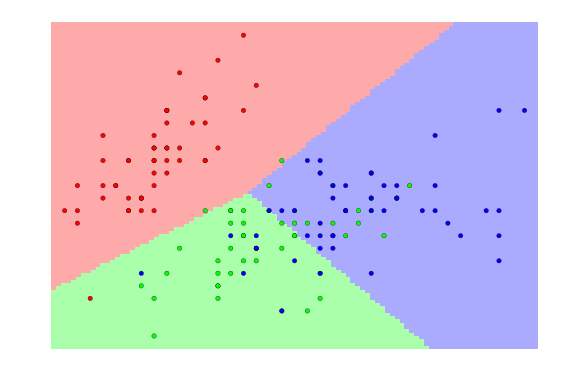

In [7]:
plot_estimator(svm.LinearSVC(), X, y)

SVRs (Support Vector Regression) work like SVCs, but for regression rather than classification.

## Support vectors and regularisation

**Support vectors**: The way a support vector machine works is by finding a decision boundary separating the 2 classes that is spanned by a small number of training samples, called "support vectors". These samples lie closest to the other class, and can thus be considered as most representative samples in terms of the two-class discrimination problem.

To make visualization even simpler, let us consider a 2 class problem, for instance using classes 1 and 2 in the iris dataset. These 2 classes are not well linearly separable, which makes it an interesting problem.

The indices of the support vectors for each class can be found in the `support_vectors_` attribute. We highlight them in the following figure.

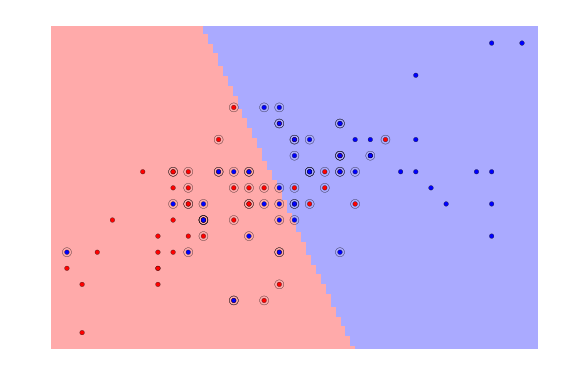

In [8]:
X, y = X[np.in1d(y, [1, 2])], y[np.in1d(y, [1, 2])]
plot_estimator(svc, X, y)
plt.scatter(svc.support_vectors_[:, 0], svc.support_vectors_[:, 1], s=80, facecolors='none', zorder=10)

**Regularization**: Considering only the discriminant samples is a form of regularization. Indeed, it forces the model to be simpler in how it combines observed structures.

This regularization can be tuned with the *C* parameter:

- Low C values: many support vectors... Decision frontier = mean(class A) - mean(class B)
- High C values: small number of support vectors: Decision frontier fully driven by most disriminant samples

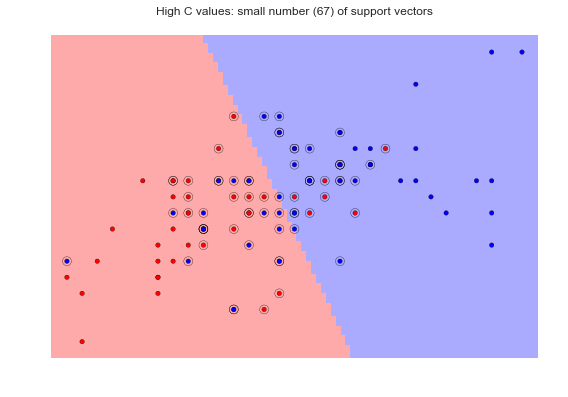

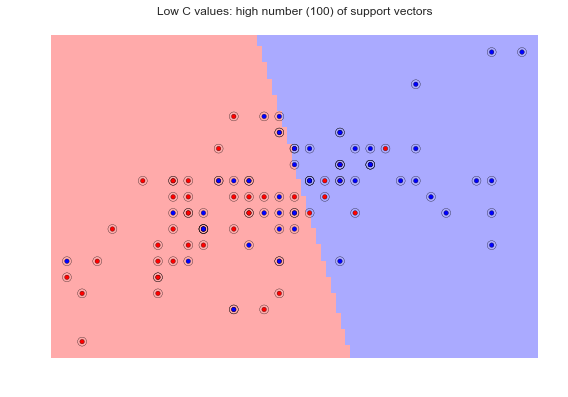

In [9]:
svc_hiC = svm.SVC(kernel='linear', C=1e3)  # C = 1,000
plot_estimator(svc_hiC, X, y)
plt.scatter(svc_hiC.support_vectors_[:, 0], svc_hiC.support_vectors_[:, 1], s=80, facecolors='none', zorder=10)
plt.title('High C values: small number ({:,}) of support vectors'.format(len(svc_hiC.support_vectors_)))

svc_loC = svm.SVC(kernel='linear', C=1e-3)  # C = 0.001
plot_estimator(svc_loC, X, y)
plt.scatter(svc_loC.support_vectors_[:, 0], svc_loC.support_vectors_[:, 1], s=80, facecolors='none', zorder=10)
plt.title('Low C values: high number ({:,}) of support vectors'.format(len(svc_loC.support_vectors_)))

One nice features of SVMs is that on many datasets, the default value 'C=1' works well.

**Practical note: Normalizing data** For many estimators, including the SVMs, having datasets with unit standard deviation for each feature is often important to get good prediction.

## Kernels

One appealling aspect of SVMs is that they can easily be used to build non linear decision frontiers using **kernels**. Kernel define the 'building blocks' that are assembled to form a decision rule.

- **linear** will give linear decision frontiers. It is the most computationally efficient approach and the one that requires the least amount of data.

- **poly** will give decision frontiers that are polynomial. The order of this polynomial is given by the 'order' argument.

- **rbf** uses 'radial basis functions' centered at each support vector to assemble a decision frontier. The size of the RBFs, that ultimately controls the smmothness of the decision frontier. RBFs are the most flexible approach, but also the one that will require the largest amount of data.

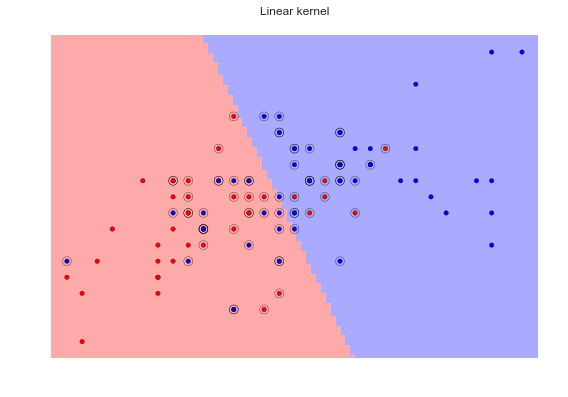

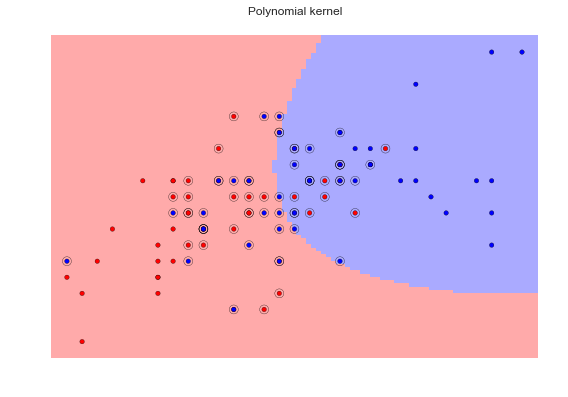

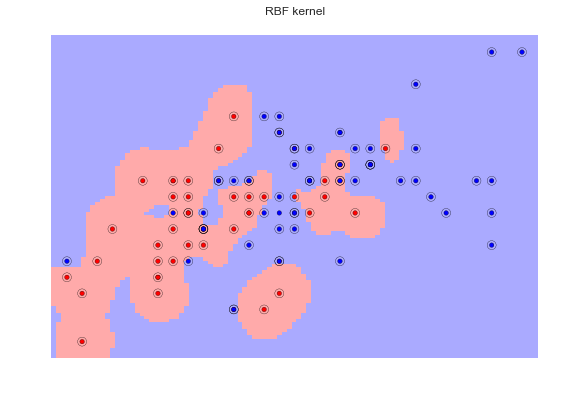

In [10]:
svc = svm.SVC(kernel='linear')
plot_estimator(svc, X, y)
plt.scatter(svc.support_vectors_[:, 0], svc.support_vectors_[:, 1], s=80, facecolors='none', zorder=10)
plt.title('Linear kernel')

svc = svm.SVC(kernel='poly', degree=4)
plot_estimator(svc, X, y)
plt.scatter(svc.support_vectors_[:, 0], svc.support_vectors_[:, 1], s=80, facecolors='none', zorder=10)
plt.title('Polynomial kernel')

svc = svm.SVC(kernel='rbf', gamma=1e2)
plot_estimator(svc, X, y)
plt.scatter(svc.support_vectors_[:, 0], svc.support_vectors_[:, 1], s=80, facecolors='none', zorder=10)
plt.title('RBF kernel')

We can see that RBFs and more flexible and fit our train data best. Remember, minimizing train error is not a goal per se, and we have to watch for overfit.

## Exercise 1: tune an SVM on the digits dataset

In [11]:
from sklearn import datasets
digits = datasets.load_digits()
X, y = digits.data, digits.target
#... now all that is left to do is the prediction

In [16]:
X

array([[  0.,   0.,   5., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,  10.,   0.,   0.],
       [  0.,   0.,   0., ...,  16.,   9.,   0.],
       ..., 
       [  0.,   0.,   1., ...,   6.,   0.,   0.],
       [  0.,   0.,   2., ...,  12.,   0.,   0.],
       [  0.,   0.,  10., ...,  12.,   1.,   0.]])

In [22]:
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [27]:
svc_lin = svm.SVC(kernel='linear')
svc_lin.fit(X_train, y_train)
print svc_lin.score(X_test, y_test)

svc_poly = svm.SVC(kernel='poly', degree = 3)
svc_poly.fit(X_train, y_train)
print svc_poly.score(X_test, y_test)

svc_rbf = svm.SVC(kernel='rbf', gamma = 1)
svc_rbf.fit(X_train, y_train)
print svc_rbf.score(X_test, y_test)

0.986111111111
0.991666666667
0.0888888888889


## Exercise 2: Example from Image Processing

Here we'll take a look at a simple facial recognition example.
This uses a dataset available within scikit-learn consisting of a
subset of the [Labeled Faces in the Wild](http://vis-www.cs.umass.edu/lfw/)
data.  Note that this is a relatively large download (~200MB) so it may
take a while to execute.

In [1]:
from sklearn import datasets
lfw_people = datasets.fetch_lfw_people(min_faces_per_person=70, resize=0.4,
                                       data_home='datasets')
lfw_people.data.shape

(1288L, 1850L)

If you're on a unix-based system such as linux or Mac OSX, these shell commands
can be used to see the downloaded dataset:

In [ ]:
!ls datasets

In [ ]:
!du -sh datasets/lfw_home

Let's visualize these faces to see what we're working with:

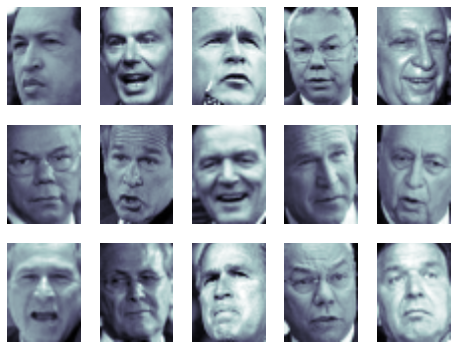

In [28]:
fig = plt.figure(figsize=(8, 6))
# plot several images
for i in range(15):
    ax = fig.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(lfw_people.images[i], cmap=plt.cm.bone)

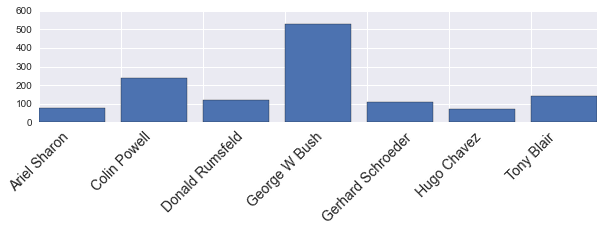

In [29]:
plt.figure(figsize=(10, 2))

unique_targets = np.unique(lfw_people.target)
counts = [(lfw_people.target == i).sum() for i in unique_targets]

plt.xticks(unique_targets, lfw_people.target_names[unique_targets])
locs, labels = plt.xticks()
plt.setp(labels, rotation=45, size=14)
_ = plt.bar(unique_targets, counts)

One thing to note is that these faces have already been localized and scaled
to a common size.  This is an important preprocessing piece for facial
recognition, and is a process that can require a large collection of training
data.  This can be done in scikit-learn, but the challenge is gathering a
sufficient amount of training data for the algorithm to work

Fortunately, this piece is common enough that it has been done.  One good
resource is [OpenCV](http://opencv.willowgarage.com/wiki/FaceRecognition), the
*Open Computer Vision Library*.

We'll perform a Support Vector classification of the images.  We'll
do a typical train-test split on the images to make this happen:

In [30]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(lfw_people.data, lfw_people.target, random_state=0)

print X_train.shape, X_test.shape

(966L, 1850L) (322L, 1850L)


## Preprocessing: Principal Component Analysis

1850 dimensions is a lot for SVM.  We can use PCA to reduce these 1850 features to a manageable
size (say, 150), while maintaining most of the information in the dataset.  Here it is useful to use a variant
of PCA called ``RandomizedPCA``, which is an approximation of PCA that can be much faster for large
datasets.

In [102]:
from sklearn.decomposition import RandomizedPCA

rpca = RandomizedPCA(n_components = 157, whiten = True)
rpca.fit(X_train)

RandomizedPCA(copy=True, iterated_power=3, n_components=157,
       random_state=None, whiten=True)

In [43]:
def pca_summary(prcomp):
    return pd.DataFrame([np.sqrt(prcomp.explained_variance_), 
              prcomp.explained_variance_ratio_, 
              prcomp.explained_variance_ratio_.cumsum()],
             index = ["Standard deviation", "Proportion of Variance", "Cumulative Proportion"], 
             columns = (map("PC{}".format, range(1, len(prcomp.components_)+1))))

In [40]:
pd.set_option('display.max_rows', 1000)
pca_summary(rpca).T


,Standard deviation,Proportion of Variance,Cumulative Proportion
PC1,696.966388,1.779776e-01,0.177978
PC2,608.483113,1.356559e-01,0.313634
PC3,443.576879,7.209075e-02,0.385724
PC4,409.984596,6.158526e-02,0.447310
PC5,350.662295,4.505260e-02,0.492362
PC6,281.107422,2.895252e-02,0.521315
PC7,261.722957,2.509721e-02,0.546412
PC8,240.868900,2.125706e-02,0.567669
PC9,234.045437,2.006976e-02,0.587739
PC10,219.835172,1.770664e-02,0.605445


One interesting part of PCA is that it computes the "mean" face, which can be
interesting to examine using `plt.imshow`:
```python
plt.imshow(pca.mean_.reshape((50, 37)), cmap=plt.cm.bone)
```

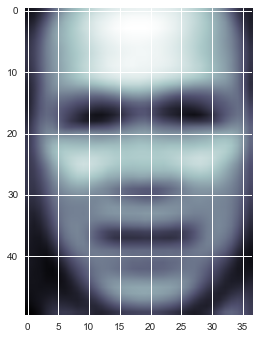

In [35]:
plt.imshow(rpca.mean_.reshape((50, 37)), cmap=plt.cm.bone)

The principal components measure deviations about this mean along orthogonal axes.
It is also interesting to visualize these principal components:

*hint: notice how we used* `fig.add_subplot` *above to plot a grid of faces. Do the same to plot the* PCA `components_`

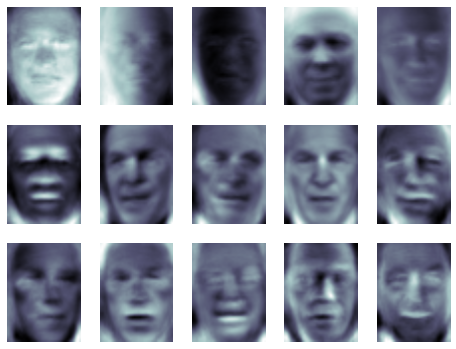

In [54]:
fig = plt.figure(figsize=(8, 6))

for i in range(15):
    ax = fig.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(rpca.components_[i].reshape((50, 37)), cmap=plt.cm.bone)

The components ("eigenfaces") are ordered by their importance from top-left to bottom-right.
We see that the first few components seem to primarily take care of lighting
conditions; the remaining components pull out certain identifying features:
the nose, eyes, eyebrows, etc.

With this projection computed, we can now project our original training
and test data onto the PCA basis:

In [103]:
X_train_rpca = rpca.fit_transform(X_train)
X_test_rpca = rpca.transform(X_test)

These projected components correspond to factors in a linear combination of
component images such that the combination approaches the original face.

## Doing the Learning: Support Vector Machines

Now we'll perform support-vector-machine classification on this reduced dataset. Start with:
```python
svm.SVC(C=5., gamma=0.001)
```

In [104]:
svc = svm.SVC(C = 5, gamma = 0.001)
svc.fit(X_train_rpca, y_train)

SVC(C=5, cache_size=200, class_weight=None, coef0=0.0, degree=3, gamma=0.001,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [105]:
y_pred = svc.predict(X_test_rpca)

Finally, we can evaluate how well this classification did.  First, we might plot a
few of the test-cases with the labels learned from the training set. 
Putting something like the following in your `for` loop might help:

```python
color = 'black' if y_pred == y_test[i] else 'red'
ax.set_title(lfw_people.target_names[y_pred], fontsize='small', color=color)
```

In [106]:
X_test_rpca.shape
X_train_rpca.shape

(966L, 157L)

In [107]:
svc.score(X_test_rpca, y_test)

0.82919254658385089

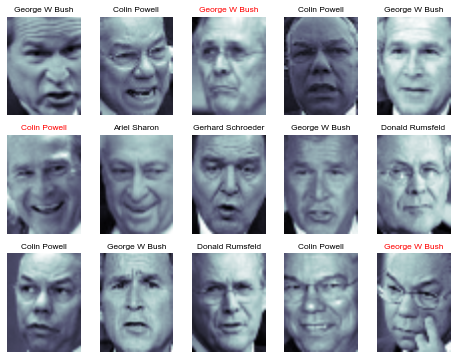

In [108]:
fig = plt.figure(figsize=(8, 6))

for i in range(15):
    ax = fig.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(X_test[i].reshape((50, 37)), cmap=plt.cm.bone)
    color = 'black' if y_pred[i] == y_test[i] else 'red'
    ax.set_title(lfw_people.target_names[y_pred[i]], fontsize='small', color=color)

The classifier is correct on an impressive number of images given the simplicity
of its learning model!  Using a linear classifier on 150 features derived from
the pixel-level data, the algorithm correctly identifies a large number of the
people in the images.

Again, we can
quantify this effectiveness using one of several measures from the ``sklearn.metrics``
module.  First we can do the classification report, which shows the precision,
recall and other measures of the "goodness" of the classification:

In [94]:
from sklearn import metrics
metrics.classification_report?

Another interesting metric is the *confusion matrix*, which indicates how often
any two items are mixed-up.  The confusion matrix of a perfect classifier
would only have nonzero entries on the diagonal, with zeros on the off-diagonal.

In [109]:
metrics.confusion_matrix(y_test, y_pred)

array([[ 18,   6,   0,   4,   0,   0,   0],
       [  1,  57,   0,   2,   0,   1,   2],
       [  0,   2,  18,   4,   0,   0,   0],
       [  1,   7,   3, 120,   0,   0,   1],
       [  0,   0,   0,   2,  16,   0,   2],
       [  0,   2,   0,   5,   1,  13,   1],
       [  1,   1,   2,   3,   1,   0,  25]])

In [97]:
metrics.f1_score?

## Pipelining

Above we used PCA as a pre-processing step before applying our support vector machine classifier.
Plugging the output of one estimator directly into the input of a second estimator is a commonly
used pattern; for this reason scikit-learn provides a ``Pipeline`` object which automates this
process.  The above problem can be re-expressed as a pipeline as follows:

In [112]:
from sklearn.pipeline import Pipeline

pipe = Pipeline(
                (('rpca', RandomizedPCA()),
                 ('svm', svm.SVC())
                ))

The results are not identical because we used the randomized version of the PCA -- because the
projection varies slightly each time, the results vary slightly as well.

## A Quick Note on Facial Recognition

Here we have used PCA "eigenfaces" as a pre-processing step for facial recognition.
The reason we chose this is because PCA is a broadly-applicable technique, which can
be useful for a wide array of data types.  Research in the field of facial recognition
in particular, however, has shown that other more specific feature extraction methods
are can be much more effective.

## Grid Search:

Use grid search to determine

1. If it is better to `whiten` or not.
2. Whether the `rbf`, `linear`, or `poly` kernel is best.

In [ ]:
from sklearn.grid_search import GridSearchCV

parameters = {
    'svm__kernel': ['linear', 'rbf', 'poly'],
    'svm__degree': [1, 2, 3],
    'svm__C': [0.001, 1.0, 1000],
    'svm__gamma': [0.001, 0, 1000]
}
gs = GridSearchCV(pipe, parameters, verbose = 0, refit = False, n_jobs = 2)
_ = gs.fit(X_train, y_train)